https://youtu.be/ivBtpzHcvpg?si=qaimDFgxVpihHQkq

In [21]:
import numpy as np

$$\mathbb{E}_{x \sim p(x)}\left[  h(x) \right] = \int_0^{10} h(x)p(x)dx$$

- $h(x) = e^{-2|x-5|}$
- $p(x) = \frac 1 {10} ~~~~ x \sim \mathcal{U}(0,10)$

as $\int h(x)$ is tractable, we can compute the real expectation value, so that we can compare the sampling algorithm's performance

$$\int e^{-2|x-5|}dx = 1 - \frac {1} {e^{10}} \approx 0.99995 \\
 = 10 \int_0^{10} e^{-2|x-5|}\frac 1 {10}dx\\
 = 10 \int_0^{10} h(x)p(x)dx \\
 = 10\mathbb{E}_{x \sim p(x)}h(x)$$

$\therefore \mathbb{E}\left[h(x)\right] \approx 0.09995$

### Using Monte Calro Estimation

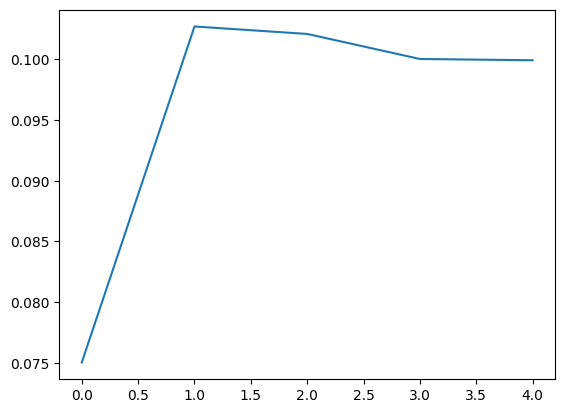

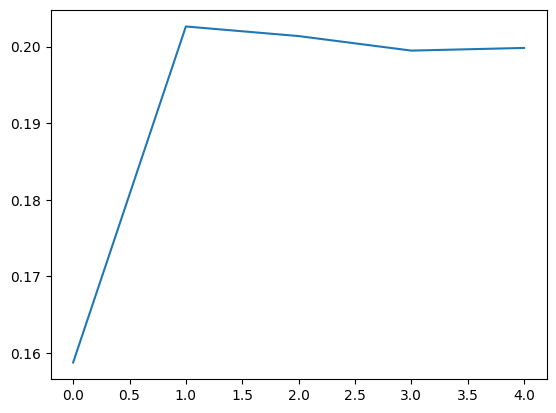

In [22]:
import numpy as np
import matplotlib.pyplot as plt

h = lambda x : np.exp(-2 * np.abs(x - 5))
p = 0.1

# sample from Uniform(0, 10)
x = lambda num_samples : np.random.rand(1, num_samples) * 10

# Monte Calro: Mean is the Expected Value
U_means = []
U_stds = []

for i in range(2, 7):
    num_samples = 10 ** i
    samples = h(x(num_samples))
    mean = samples.mean()
    std = samples.std()
    U_means.append(mean)
    U_stds.append(std)

plt.plot(U_means)
plt.show()

plt.plot(U_stds)
plt.show()

### Using Importance Sampling

위의 경우, h(x)는 x = 5에서 큰 값을 갖는 벨 쉐입의 함수인데, p(x)가 U(0,10)이라서, h(x)가 아주 작은 값을 갖는 0과 10 인근에서도 동일한 빈도수로 샘플링을 하게 됨. 

어차피 0과 10 주변, 즉 5에서 멀어질 수록 거기서 샘플링을 하든 안하든 기대값을 구하는데 큰 문제가 없기 때문에, 차라리 중요한 5 인근에서 많이 샘플링하는게 이득이지 않을까?

**Importance Sampling**
$$\int h(x)p(x)dx = \int h(x)p(x)\frac {q(x)}{q(x)}dx \\
 = \int h(x) \frac {p(x)} {q(x)} q(x) dx \\
 = \mathbb{E}_{x \sim q(x)} \left[h(x)\frac {p(x)} {q(x)}\right]$$

- $q(x) \sim \mathcal{N}(5, 1)$ 로 설정하여 5 주변에서 더 많이 샘플링할 수 있도록한거



> 그렇다면 여기서 궁금점
> - h(x)가 높은 값을 갖는 부분에서 더 많이 샘플링 할 수 있는 q(x)를 설정하기 위해선, h(x)가 어떤 형태인지를 알 수 있어야한다는건데, Deep Learning area에서도 항상 h(x)의 꼴을 알 수 있는건가...?


In [23]:
import math

q = lambda x : 1 / np.sqrt(2 * np.pi) * np.exp(-(x - 5) ** 2 / 2)

[[3.81897179 3.14098391 5.37683534 4.67708148 3.77019805 4.90372246
  6.28954415 5.11008737 5.43633907 5.85981917 4.57999479 5.2719056
  6.02289132 5.37748963 4.75766327 4.54185009 2.93127061 5.15914005
  3.30366279 4.27366879 3.77869486 3.45480967 4.45665496 7.48786303
  5.13875065 4.31099932 5.16192694 5.13322589 5.26560227 5.45553379
  3.34350143 4.24637734 5.21025762 6.73062297 4.68425683 4.45779852
  5.78919541 5.07817846 5.97931544 3.83222965 4.99542537 4.81411743
  2.97918609 4.04475599 5.37894964 6.46453643 5.87898041 7.21747236
  4.60107999 4.02628854 5.23834786 3.84361619 3.68850038 5.79268103
  4.17687864 5.88175071 4.45108956 4.38534558 3.79157076 3.68910946
  5.71419254 6.23456405 6.12913078 3.29411887 6.53274109 6.05781586
  4.282094   4.39692548 5.38545756 5.58031942 5.88038442 4.90525074
  4.94878255 4.57407574 5.03026194 4.54949011 4.60866718 5.8822744
  5.32781571 5.73452052 5.25554819 4.4139919  4.78235346 3.26511739
  4.77937319 5.05375505 4.75500874 5.66794433 5.98

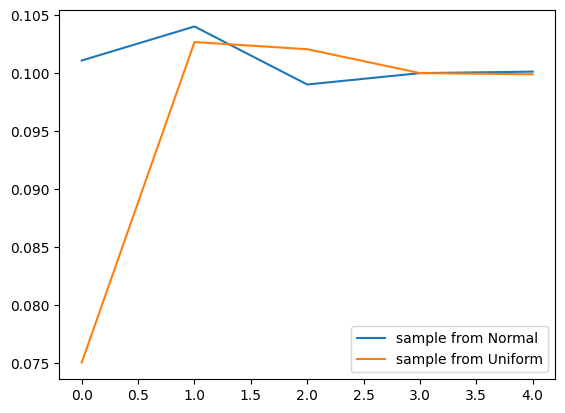

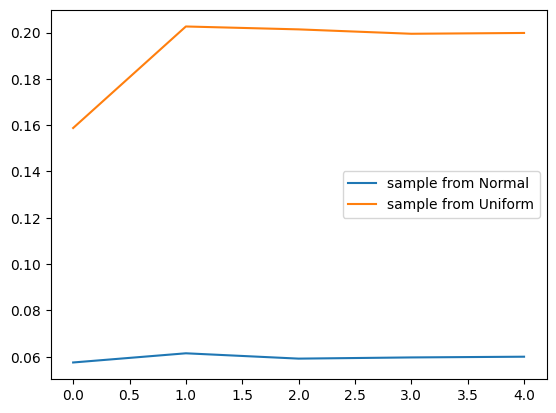

In [25]:
N_means = []
N_stds = []

x = lambda num_samples : 5. + np.random.randn(1, num_samples) # X ~ N(5, 1)


for i in range(2, 7):
    num_samples = 10 ** i
    samples = x(num_samples)
    print(samples)
    samples = h(samples) * p / q(samples)
    mean = samples.mean()
    std = samples.std()
    N_means.append(mean)
    N_stds.append(std)

plt.plot(N_means, label='sample from Normal')
plt.plot(U_means, label='sample from Uniform')
plt.legend()
plt.show()

plt.plot(N_stds ,label='sample from Normal')
plt.plot(U_stds ,label='sample from Uniform')
plt.legend()
plt.show()